In [1]:
import pandas as pd

# Loading dataset

In [2]:
def convertToCsv(inputfilepath, outputfilename, columns, split):
    with open(inputfilepath, 'r') as f:
        lines = f.readlines()
        
    # Splitting each line based on the specified delimiter
    data = [line.strip().split(split) for line in lines]
    
    # Creating a DataFrame
    df = pd.DataFrame(data, columns=columns)
    
    # Save the DataFrame to a CSV file
    df.to_csv(outputfilename, index=False)

In [3]:
convertToCsv('./GenreClassificationDataset/train_data.txt', 'train.csv', ['ID', 'Title', 'Genre', 'Description'], ':::')


In [4]:
convertToCsv('./GenreClassificationDataset/test_data.txt', 'test.csv', ['ID', 'Title', 'Description'], ':::')


In [5]:
train,test = pd.read_csv("train.csv"), pd.read_csv("test.csv")

In [6]:
train.head()


,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
test.head()

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [8]:
test1 = test
test1.head()


,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [9]:
test1["description"] = test1["Description"].str.lower()
test1["title"] = test1["Title"].str.lower()
test1 = test1.drop(["Title","Description"],axis=1)
test1.head()

,ID,description,title
0,1,"l.r. brane loves his life - his car, his apar...",edgar's lunch (1998)
1,2,"spain, march 1964: quico is a very naughty ch...",la guerra de papá (1977)
2,3,one year in the life of albin and his family ...,off the beaten track (2010)
3,4,"his father has died, he hasn't spoken with hi...",meu amigo hindu (2015)
4,5,before he was known internationally as a mart...,er nu zhai (1955)


# EDA

In [10]:
train.isna().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [11]:
def descriptionLength(text):
    text_collection = text.split(" ")
    print(text_collection)
    return len(text_collection)

In [12]:
descriptionLength(train["Description"][0])

['', 'Listening', 'in', 'to', 'a', 'conversation', 'between', 'his', 'doctor', 'and', 'parents,', '10-year-old', 'Oscar', 'learns', 'what', 'nobody', 'has', 'the', 'courage', 'to', 'tell', 'him.', 'He', 'only', 'has', 'a', 'few', 'weeks', 'to', 'live.', 'Furious,', 'he', 'refuses', 'to', 'speak', 'to', 'anyone', 'except', 'straight-talking', 'Rose,', 'the', 'lady', 'in', 'pink', 'he', 'meets', 'on', 'the', 'hospital', 'stairs.', 'As', 'Christmas', 'approaches,', 'Rose', 'uses', 'her', 'fantastical', 'experiences', 'as', 'a', 'professional', 'wrestler,', 'her', 'imagination,', 'wit', 'and', 'charm', 'to', 'allow', 'Oscar', 'to', 'live', 'life', 'and', 'love', 'to', 'the', 'full,', 'in', 'the', 'company', 'of', 'his', 'friends', 'Pop', 'Corn,', 'Einstein,', 'Bacon', 'and', 'childhood', 'sweetheart', 'Peggy', 'Blue.']


93

In [13]:
genre_counts = train['Genre'].value_counts()
genre_counts

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

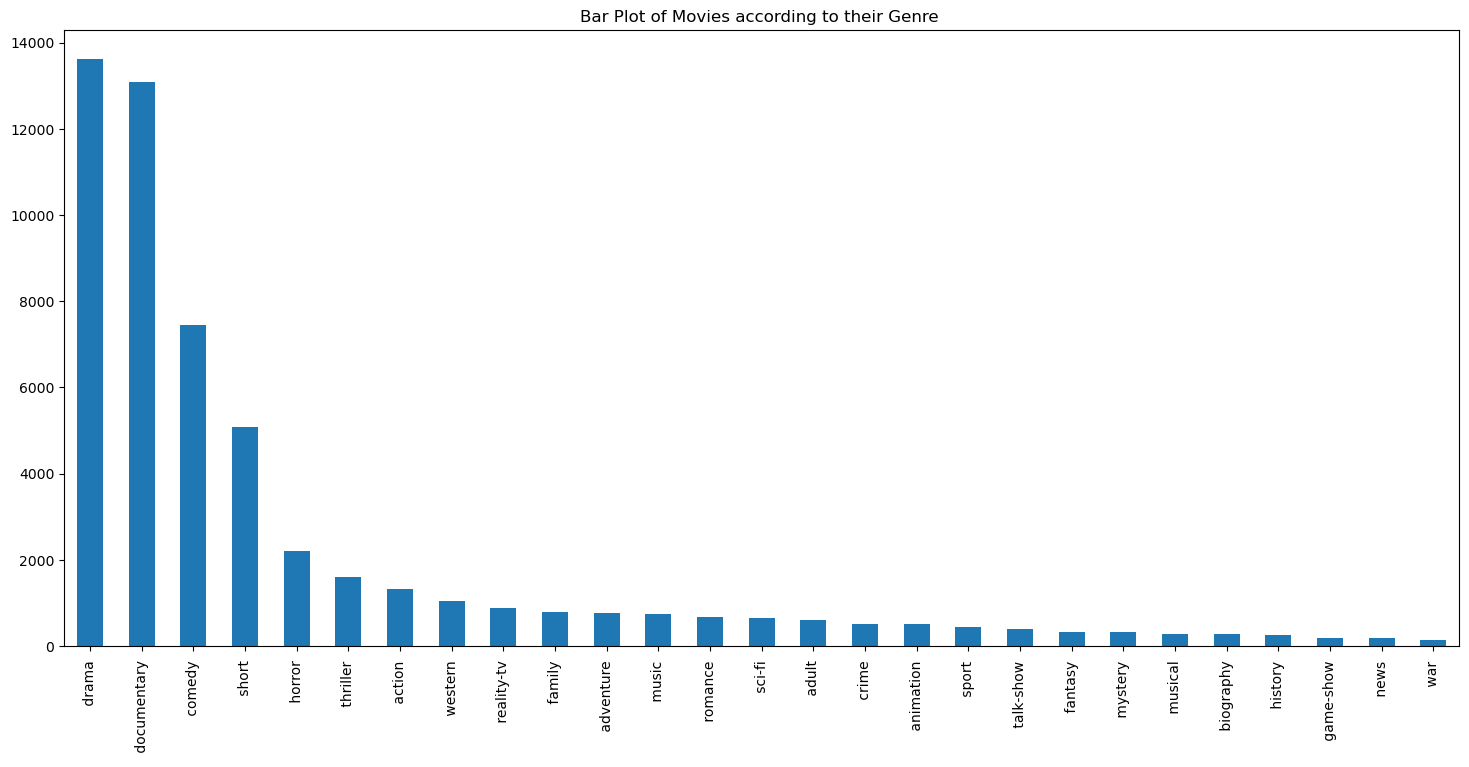

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.title("Bar Plot of Movies according to their Genre ")
genre_counts.plot(kind='bar', x="Genre", y="Count")
plt.show()


In [77]:
num_classes = len(train["Genre"].unique())
num_classes

27

# Training the Classifier

In [15]:
# Importing necessary libraries from Natural Language ToolKit
import nltk
from nltk import Text
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords


In [16]:
from nltk.stem import PorterStemmer

In [17]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sudhinkarki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sudhinkarki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

In [19]:
train1 = train

In [20]:
train1["description"] = train["Description"].str.lower()

In [21]:
train1["title"] = train["Title"].str.lower()

In [22]:
train1 = train1.drop(["Title","Description"],axis=1)

In [23]:
train2 = train1

In [24]:
train2.head()

,ID,Genre,description,title
0,1,drama,listening in to a conversation between his do...,oscar et la dame rose (2009)
1,2,thriller,a brother and sister with a past incestuous r...,cupid (1997)
2,3,adult,as the bus empties the students for their fie...,"young, wild and wonderful (1980)"
3,4,drama,to help their unemployed father make ends mee...,the secret sin (1915)
4,5,drama,the film's title refers not only to the un-re...,the unrecovered (2007)


In [25]:
train2["description"] = train2["description"].apply(word_tokenize)
train2["title"] = train2["title"].apply(word_tokenize)

In [26]:
train2.head()

,ID,Genre,description,title
0,1,drama,"[listening, in, to, a, conversation, between, ...","[oscar, et, la, dame, rose, (, 2009, )]"
1,2,thriller,"[a, brother, and, sister, with, a, past, inces...","[cupid, (, 1997, )]"
2,3,adult,"[as, the, bus, empties, the, students, for, th...","[young, ,, wild, and, wonderful, (, 1980, )]"
3,4,drama,"[to, help, their, unemployed, father, make, en...","[the, secret, sin, (, 1915, )]"
4,5,drama,"[the, film, 's, title, refers, not, only, to, ...","[the, unrecovered, (, 2007, )]"


In [27]:
#Removing stopwords
train3 = train2
train3.head()


,ID,Genre,description,title
0,1,drama,"[listening, in, to, a, conversation, between, ...","[oscar, et, la, dame, rose, (, 2009, )]"
1,2,thriller,"[a, brother, and, sister, with, a, past, inces...","[cupid, (, 1997, )]"
2,3,adult,"[as, the, bus, empties, the, students, for, th...","[young, ,, wild, and, wonderful, (, 1980, )]"
3,4,drama,"[to, help, their, unemployed, father, make, en...","[the, secret, sin, (, 1915, )]"
4,5,drama,"[the, film, 's, title, refers, not, only, to, ...","[the, unrecovered, (, 2007, )]"


In [28]:
stop_words = set(stopwords.words('english'))
train3["title"] = train3["title"].apply(lambda tokens: [word for word in tokens if word not in stop_words])
train3["description"] = train3["description"].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [29]:
train3["title"] = train3["title"].apply(lambda tokens: [word for word in tokens if word.isalnum()])
train3["description"] = train3["description"].apply(lambda tokens: [word for word in tokens if word.isalnum()])

In [30]:
train4 = train3
train4.head()

,ID,Genre,description,title
0,1,drama,"[listening, conversation, doctor, parents, osc...","[oscar, et, la, dame, rose, 2009]"
1,2,thriller,"[brother, sister, past, incestuous, relationsh...","[cupid, 1997]"
2,3,adult,"[bus, empties, students, field, trip, museum, ...","[young, wild, wonderful, 1980]"
3,4,drama,"[help, unemployed, father, make, ends, meet, e...","[secret, sin, 1915]"
4,5,drama,"[film, title, refers, bodies, ground, zero, al...","[unrecovered, 2007]"


In [31]:
#Reducing to the base form
porter = PorterStemmer()
train4["title"] = train4["title"].apply(lambda tokens: [porter.stem(word) for word in tokens])
train4["description"] = train4["description"].apply(lambda tokens: [porter.stem(word) for word in tokens])

In [32]:
train5 = train4
train5.head()

,ID,Genre,description,title
0,1,drama,"[listen, convers, doctor, parent, oscar, learn...","[oscar, et, la, dame, rose, 2009]"
1,2,thriller,"[brother, sister, past, incestu, relationship,...","[cupid, 1997]"
2,3,adult,"[bu, empti, student, field, trip, museum, natu...","[young, wild, wonder, 1980]"
3,4,drama,"[help, unemploy, father, make, end, meet, edit...","[secret, sin, 1915]"
4,5,drama,"[film, titl, refer, bodi, ground, zero, also, ...","[unrecov, 2007]"


In [33]:
train5["title"] = train5["title"].apply(lambda tokens: ' '.join(tokens))
train5["description"] = train5["description"].apply(lambda tokens: ' '.join(tokens))

In [34]:
train5.head()

,ID,Genre,description,title
0,1,drama,listen convers doctor parent oscar learn nobod...,oscar et la dame rose 2009
1,2,thriller,brother sister past incestu relationship curre...,cupid 1997
2,3,adult,bu empti student field trip museum natur histo...,young wild wonder 1980
3,4,drama,help unemploy father make end meet edith twin ...,secret sin 1915
4,5,drama,film titl refer bodi ground zero also state na...,unrecov 2007


In [35]:
print(train5.iloc[0])

ID                                                             1
Genre                                                     drama 
description    listen convers doctor parent oscar learn nobod...
title                                 oscar et la dame rose 2009
Name: 0, dtype: object


In [36]:
train6 = train5
train6.head()

,ID,Genre,description,title
0,1,drama,listen convers doctor parent oscar learn nobod...,oscar et la dame rose 2009
1,2,thriller,brother sister past incestu relationship curre...,cupid 1997
2,3,adult,bu empti student field trip museum natur histo...,young wild wonder 1980
3,4,drama,help unemploy father make end meet edith twin ...,secret sin 1915
4,5,drama,film titl refer bodi ground zero also state na...,unrecov 2007


In [48]:
train6["text"] = train6["description"] + " " + train6["title"]
train6 = train6.drop(["description", "title"], axis=1)
train6.head()

,ID,Genre,text
0,1,drama,listen convers doctor parent oscar learn nobod...
1,2,thriller,brother sister past incestu relationship curre...
2,3,adult,bu empti student field trip museum natur histo...
3,4,drama,help unemploy father make end meet edith twin ...
4,5,drama,film titl refer bodi ground zero also state na...


In [38]:
test1["description"] = test1["description"].apply(word_tokenize)
test1["title"] = test1["title"].apply(word_tokenize)

In [39]:
test2 = test1
test2.head()

,ID,description,title
0,1,"[l.r, ., brane, loves, his, life, -, his, car,...","[edgar, 's, lunch, (, 1998, )]"
1,2,"[spain, ,, march, 1964, :, quico, is, a, very,...","[la, guerra, de, papá, (, 1977, )]"
2,3,"[one, year, in, the, life, of, albin, and, his...","[off, the, beaten, track, (, 2010, )]"
3,4,"[his, father, has, died, ,, he, has, n't, spok...","[meu, amigo, hindu, (, 2015, )]"
4,5,"[before, he, was, known, internationally, as, ...","[er, nu, zhai, (, 1955, )]"


In [41]:
stop_words = set(stopwords.words('english'))
test2["title"] = test2["title"].apply(lambda tokens: [word for word in tokens if word not in stop_words])
test2["description"] = test2["description"].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [42]:
test2["title"] = test2["title"].apply(lambda tokens: [word for word in tokens if word.isalnum()])
test2["description"] = test2["description"].apply(lambda tokens: [word for word in tokens if word.isalnum()])


In [43]:
test3 = test2
test3.head()

,ID,description,title
0,1,"[brane, loves, life, car, apartment, job, espe...","[edgar, lunch, 1998]"
1,2,"[spain, march, 1964, quico, naughty, child, th...","[la, guerra, de, papá, 1977]"
2,3,"[one, year, life, albin, family, shepherds, no...","[beaten, track, 2010]"
3,4,"[father, died, spoken, brother, 10, years, ser...","[meu, amigo, hindu, 2015]"
4,5,"[known, internationally, martial, arts, supers...","[er, nu, zhai, 1955]"


In [44]:
test3["title"] = test3["title"].apply(lambda tokens: [porter.stem(word) for word in tokens])
test3["description"] = test3["description"].apply(lambda tokens: [porter.stem(word) for word in tokens])


In [45]:
test4 = test3
test4.head()

,ID,description,title
0,1,"[brane, love, life, car, apart, job, especi, g...","[edgar, lunch, 1998]"
1,2,"[spain, march, 1964, quico, naughti, child, th...","[la, guerra, de, papá, 1977]"
2,3,"[one, year, life, albin, famili, shepherd, nor...","[beaten, track, 2010]"
3,4,"[father, die, spoken, brother, 10, year, serio...","[meu, amigo, hindu, 2015]"
4,5,"[known, intern, martial, art, superstar, bruce...","[er, nu, zhai, 1955]"


In [46]:
test4["title"] = test4["title"].apply(lambda tokens: ' '.join(tokens))
test4["description"] = test4["description"].apply(lambda tokens: ' '.join(tokens))
test4.head()

,ID,description,title
0,1,brane love life car apart job especi girlfrien...,edgar lunch 1998
1,2,spain march 1964 quico naughti child three bel...,la guerra de papá 1977
2,3,one year life albin famili shepherd north tran...,beaten track 2010
3,4,father die spoken brother 10 year seriou cance...,meu amigo hindu 2015
4,5,known intern martial art superstar bruce lee a...,er nu zhai 1955


In [47]:
test5 = test4
test5["text"] = test4["description"] + " "+ test4["title"]
test5 = test5.drop(["description", "title"], axis=1)
test5.head()

,ID,text
0,1,brane love life car apart job especi girlfrien...
1,2,spain march 1964 quico naughti child three bel...
2,3,one year life albin famili shepherd north tran...
3,4,father die spoken brother 10 year seriou cance...
4,5,known intern martial art superstar bruce lee a...


In [49]:
x_train = train6["text"]
y_train = train6["Genre"]


In [50]:
x_test = test5["text"]

## TF-IDF Vectorizer

In [51]:
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)


In [52]:
x_test_tfidf = tfidf_vectorizer.transform(x_test)


## Multinomial Naive Bayes Classifier

In [53]:
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [54]:
predictions = model.predict(x_test_tfidf)


In [55]:
predictions

array([' drama ', ' drama ', ' documentary ', ..., ' drama ', ' drama ',
       ' documentary '], dtype='<U13')

In [58]:
results = pd.DataFrame({'id': test5['ID'], 'predicted_genre': predictions})
results.to_csv('predicted_results.csv', index=False)

# Computing model's accuracy

In [59]:
convertToCsv('./GenreClassificationDataset/test_data_solution.txt', 'test_solution.csv', ['ID', 'Title',"Genre", 'Description'], ':::')

In [60]:
from sklearn.metrics import accuracy_score
test_data_solution = pd.read_csv("test_solution.csv")
test_data_solution.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [61]:
y_true = test_data_solution["Genre"]


In [84]:
y_true

0            thriller 
1              comedy 
2         documentary 
3               drama 
4               drama 
             ...      
54195          horror 
54196         western 
54197           adult 
54198           drama 
54199           drama 
Name: Genre, Length: 54200, dtype: object

In [62]:
accuracy = accuracy_score(y_true, predictions)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.4390590405904059


### Hence the accuracy was found to be around 44%, we now try to improve the model's accuracy.

In [63]:
# But first let's go through precision, recall and F1 score.
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_true, predictions))


/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00      1314
       adult        0.00      0.00      0.00       590
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.74      0.04      0.07      7446
       crime        0.00      0.00      0.00       505
 documentary        0.51      0.89      0.65     13096
       drama        0.38      0.87      0.53     13612
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       243
      horror        0.00      0.00      0.00      2204
       music        0.00      0.00      0.00       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00      

/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Using Deep Learning Algotithms

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


2023-12-01 08:29:28.722895: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [65]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index)+1
vocab_size

103851

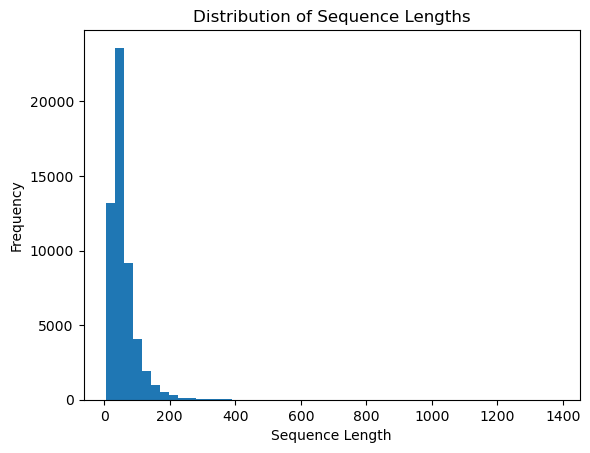

In [69]:
import matplotlib.pyplot as plt

sequence_lengths = [len(seq.split()) for seq in train6["text"]]
plt.hist(sequence_lengths, bins=50)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

### As from above figure, the maxlen for each sequence is somewhere around 50.

In [70]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train6["text"]), maxlen=50)
X_test = pad_sequences(tokenizer.texts_to_sequences(test5["text"]), maxlen=50)

In [81]:
from keras.utils import to_categorical

#prepare genre mapping
unique_genres = train["Genre"].unique()
genre_mapping = {genre: idx for idx, genre in enumerate(unique_genres)}


y_train_numerical = train["Genre"].map(genre_mapping)
y_train_onehot = to_categorical(y_train_numerical, num_classes=num_classes)

In [83]:
y_test_onehot = to_categorical(y_true, num_classes=num_classes)

ValueError: invalid literal for int() with base 10: ' thriller '

In [78]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=50))
model.add(LSTM(100))
model.add(Dense(units=num_classes, activation='softmax'))


In [79]:
model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics="accuracy")

In [82]:
model.fit(X_train, y_train_onehot,  epochs=10, batch_size=50, validation_split=0.2)

Epoch 1/10
868/868 [==============================] - 82s 92ms/step - loss: 2.1292 - accuracy: 0.3817 - val_loss: 1.9040 - val_accuracy: 0.4511
Epoch 2/10
868/868 [==============================] - 78s 90ms/step - loss: 1.6583 - accuracy: 0.5188 - val_loss: 1.6569 - val_accuracy: 0.5161
Epoch 3/10
868/868 [==============================] - 74s 85ms/step - loss: 1.2333 - accuracy: 0.6431 - val_loss: 1.6674 - val_accuracy: 0.5274
Epoch 4/10
868/868 [==============================] - 74s 86ms/step - loss: 0.8767 - accuracy: 0.7514 - val_loss: 1.8500 - val_accuracy: 0.5220
Epoch 5/10
868/868 [==============================] - 75s 86ms/step - loss: 0.6063 - accuracy: 0.8270 - val_loss: 2.0391 - val_accuracy: 0.5072
Epoch 6/10
868/868 [==============================] - 77s 89ms/step - loss: 0.3968 - accuracy: 0.8882 - val_loss: 2.3071 - val_accuracy: 0.4868
Epoch 7/10
868/868 [==============================] - 99s 114ms/step - loss: 0.2490 - accuracy: 0.9321 - val_loss: 2.6734 - val_accuracy

In [85]:
prediction_LSTM = model.predict(X_test)

1694/1694 [==============================] - 15s 9ms/step


In [86]:
prediction_LSTM

array([[5.64564943e-01, 1.03385677e-03, 7.12551980e-07, ...,
        1.04475486e-08, 1.23737621e-07, 6.44086171e-08],
       [9.99989569e-01, 2.14038693e-07, 3.12945059e-10, ...,
        5.17439691e-09, 2.17796753e-07, 1.67724681e-06],
       [2.71932058e-05, 8.56946869e-08, 1.18946586e-09, ...,
        1.44480214e-08, 3.00304741e-08, 3.55112295e-09],
       ...,
       [9.99462247e-01, 4.08652141e-07, 1.77709658e-09, ...,
        5.39930852e-07, 8.81304550e-06, 1.97817849e-06],
       [9.99962270e-01, 1.72853033e-05, 3.50355691e-08, ...,
        1.88072420e-08, 2.55880565e-07, 1.62670938e-06],
       [3.14013392e-04, 2.22457075e-07, 1.18457494e-10, ...,
        3.33468826e-08, 3.26033067e-08, 1.98956187e-07]], dtype=float32)

In [94]:
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [95]:
label_encoder = LabelEncoder()
y_true_numerical = label_encoder.fit_transform(y_true)

In [97]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
y_true_onehot = onehot_encoder.fit_transform(y_true_numerical.reshape(-1, 1))


/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [98]:
predicted_labels = np.argmax(prediction_LSTM, axis=1)


In [99]:
accuracy = accuracy_score(y_true_numerical, predicted_labels)
print("LSTM Model Accuracy:", accuracy)

LSTM Model Accuracy: 0.018653136531365314
